In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
df = pd.read_csv('benin-malanville.csv')
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [3]:
df.shape

(525600, 19)

In [4]:
# Mean, std, min, and max for all numeric columns
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()
# Median of the numerical columns 
numeric_df.median()

GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
Comments           NaN
dtype: float64

In [5]:
# Median of the numerical columns 
numeric_df.median()

GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
Comments           NaN
dtype: float64

In [6]:
# checking for null values in the dataframe
# gets missing values and datatype for a column
df.info() 
# Or we can use the code below for getting the null(missing value) count 
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [7]:
# checking if there is a duplicate row
df.duplicated().sum()
# we can get the duplicated data using the code below
# df[df.duplicated()]

0

In [8]:
threshold = len(numeric_df) * 0.5  # Drop columns with more than 50% null values got it from the meeting
data_cleaned = numeric_df.dropna(axis=1, thresh=threshold)
data_cleaned

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
525596,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
525597,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
525598,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI'>

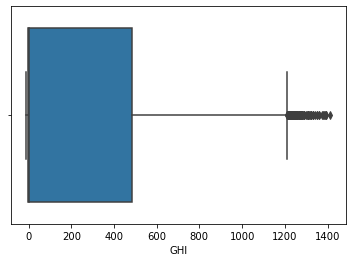

In [9]:
# We can see an outlier using boxplot
# sns.boxplot(data_cleaned['TModA'])
# sns.boxplot(data_cleaned['TModB'])
# sns.boxplot(data_cleaned['DNI'])
sns.boxplot(data_cleaned['GHI'])
# sns.boxplot(data_cleaned['DHI'])
# sns.boxplot(data_cleaned['WS'])

In [13]:
# getting mean for the outlier
upper_limit = {}
for col in data_cleaned.columns:
    upper_limit[col] = data_cleaned[col].mean() + 3* data_cleaned[col].std() # Right from the mean
upper_limit

{'GHI': 1233.9534342611373,
 'DNI': 952.3190178403266,
 'DHI': 591.4321823847492,
 'ModA': 1217.27407173739,
 'ModB': 1178.4931220517472,
 'Tamb': 45.95257378265739,
 'RH': 138.70717552167508,
 'WS': 6.93151047704769,
 'WSgust': 8.896553780289576,
 'WSstdev': 1.2935735140452733,
 'WD': 460.43369813526397,
 'WDstdev': 27.73999874243205,
 'BP': 1001.6221789851346,
 'Cleaning': 0.09201143161017246,
 'Precipitation': 0.1132504868437388,
 'TModA': 79.66779827083745,
 'TModB': 69.5179656926461}

In [14]:
# columns count with an outlier
for val in upper_limit:
    length = len(data_cleaned.loc[data_cleaned[val] >= upper_limit[val]])
    print(val, length)

GHI 89
DNI 0
DHI 3738
ModA 27
ModB 63
Tamb 0
RH 0
WS 3109
WSgust 3500
WSstdev 5653
WD 0
WDstdev 4765
BP 451
Cleaning 485
Precipitation 1402
TModA 10
TModB 98


In [15]:
# to clean the outlier we will replace the values with the upper limit 
for val in upper_limit:
    data_cleaned.loc[data_cleaned[val] >= upper_limit[val], val] = upper_limit[val]

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


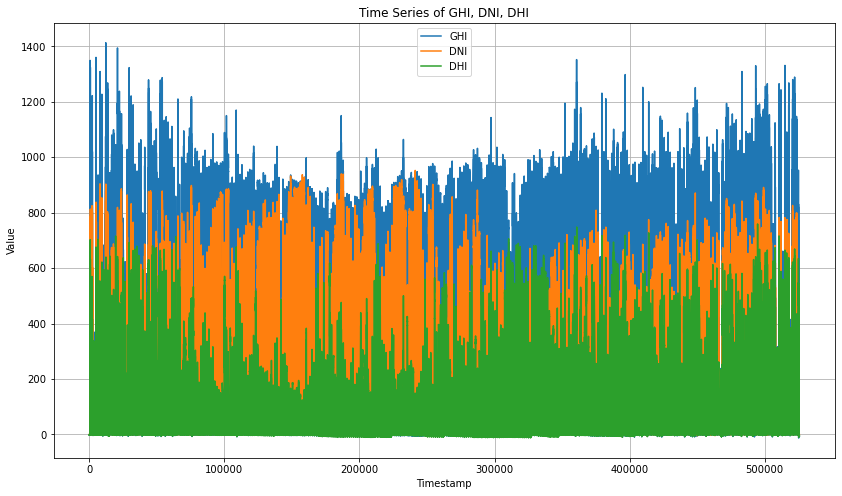

In [16]:
# Time Series Plot
plt.figure(figsize=(14, 8))

plt.plot(df.index, df['GHI'], label='GHI')
plt.plot(df.index, df['DNI'], label='DNI')
plt.plot(df.index, df['DHI'], label='DHI')

plt.title('Time Series of GHI, DNI, DHI')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

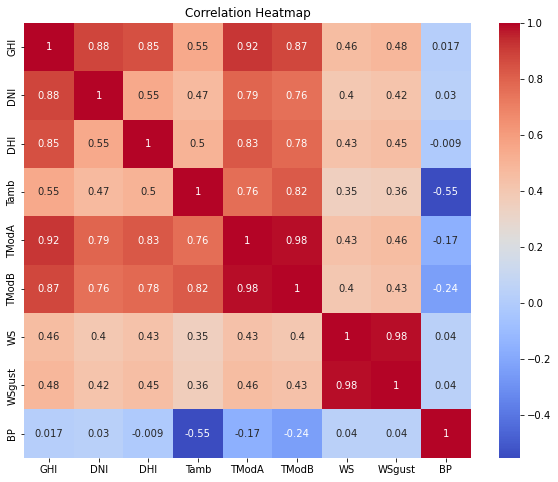

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust', 'BP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

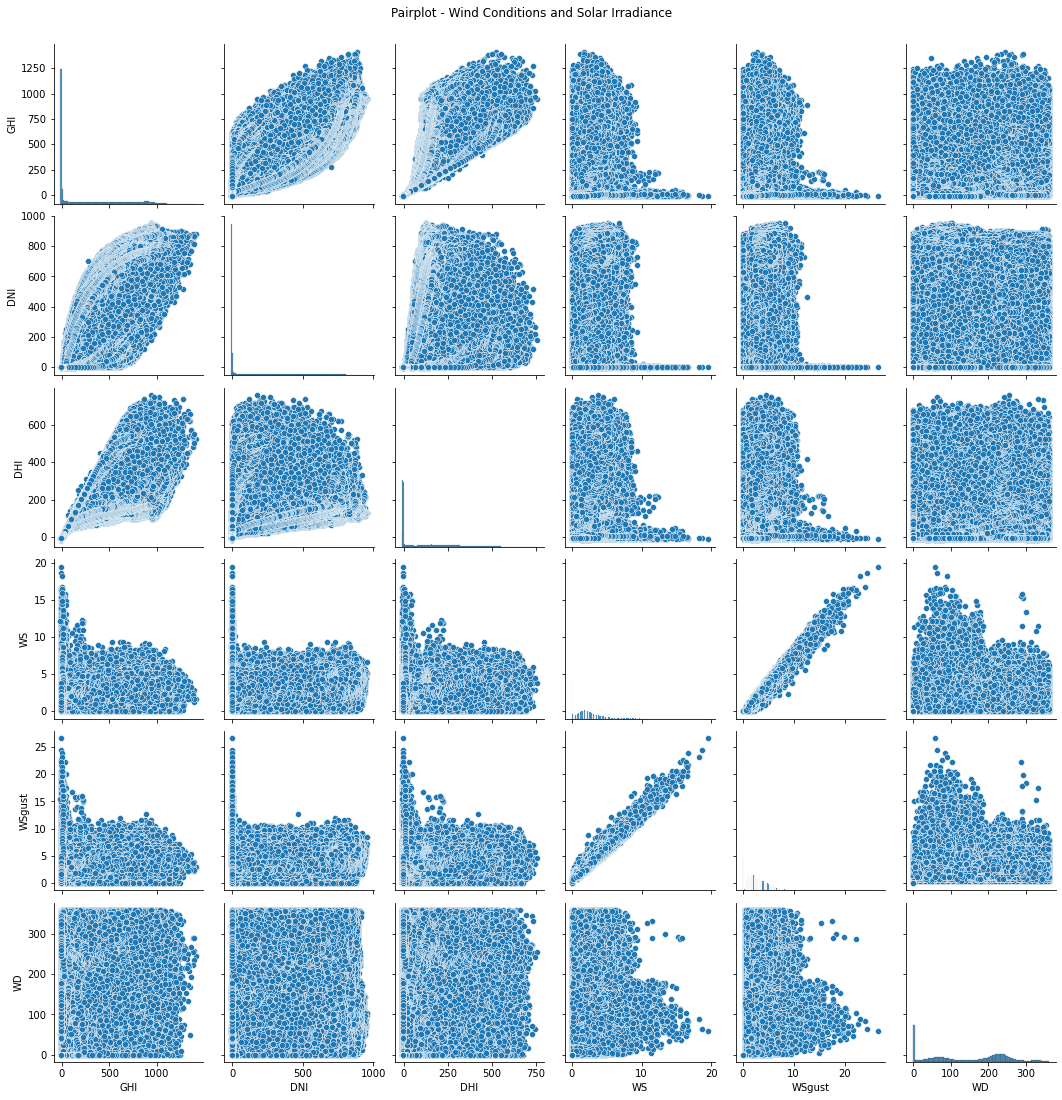

In [18]:
# Scatter matrix for wind conditions and solar irradiance
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']])
plt.suptitle('Pairplot - Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

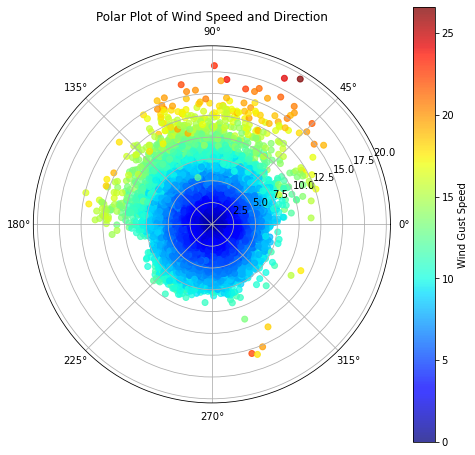

In [19]:
# Convert wind direction from degrees to radians
df['WD_rad'] = np.deg2rad(df['WD'])

# Polar plot for wind speed and direction
plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(df['WD_rad'], df['WS'], c=df['WSgust'], cmap=cm.jet, alpha=0.75)
plt.colorbar(label='Wind Gust Speed')
plt.title('Polar Plot of Wind Speed and Direction')
plt.show()

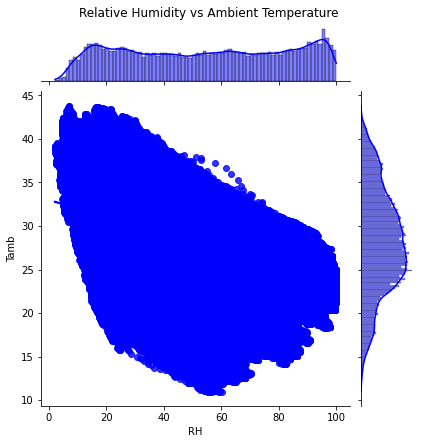

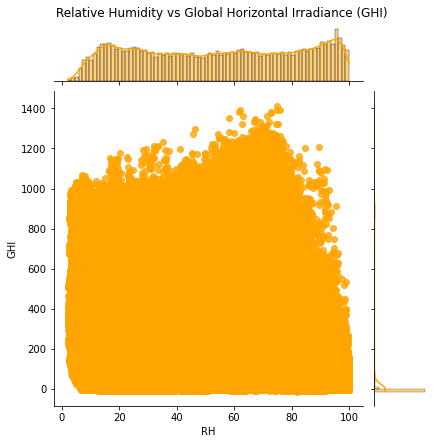

In [20]:
# Temperature Analysis
sns.jointplot(x='RH', y='Tamb', data=df, kind='reg', color='blue')
plt.suptitle('Relative Humidity vs Ambient Temperature', y=1.02)

sns.jointplot(x='RH', y='GHI', data=df, kind='reg', color='orange')
plt.suptitle('Relative Humidity vs Global Horizontal Irradiance (GHI)', y=1.02)

plt.show()

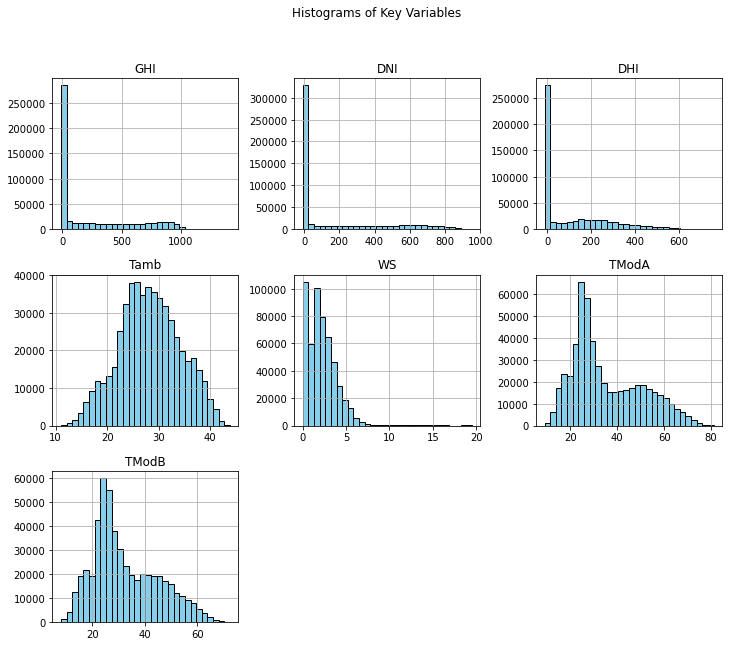

In [21]:
# histograms for GHI, DNI, DHI, wind speed, and temperatures to visualize frequency distributions.
df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'TModA', 'TModB']].hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Key Variables')
plt.show()

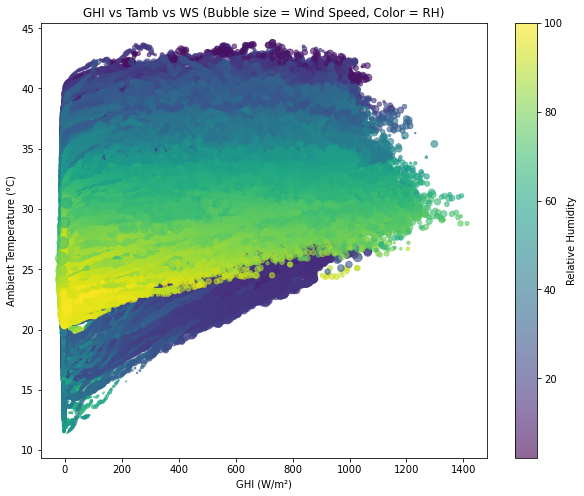

In [22]:
# bubble charts
plt.figure(figsize=(10, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['WS']*10, c=df['RH'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Relative Humidity')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs Tamb vs WS (Bubble size = Wind Speed, Color = RH)')
plt.show()